# Lead Score Case Study for X Education

## Problem Statement

## 1. Data Import and Data Understanding

Import libraries and packages

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import data from csv file
df_lead = pd.read_csv('leads.csv')

In [3]:
# Check the first few rows of the dataset 
pd.set_option('display.max_columns',60)
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Shape of dataframe - No. of rows and columns
df_lead.shape

(9240, 37)

In [5]:
#Info of data frame - different columns, their data types and null details
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Details of numeric columns
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 2. Data Cleaning

In [7]:
# Drop any duplicate rows if present
df_lead.drop_duplicates(inplace=True)

In [8]:
df_lead.shape

(9240, 37)

The no. of rows were same. Hence there was no duplicate present

#### 2.1 Dropping unwanted columns
We can drop columns Prospect ID and Lead Number as they are IDs/number assigned to each customer and doesn't help with analysis

In [9]:
df_lead.drop(["Prospect ID","Lead Number"], axis = 1, inplace = True)
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### 2.2 Replacing 'Select' with null values

Many of the categorical variables have a level called 'Select' which is as good as Null as no values were actually selected for these columns. Hence we will replace those with Nan

In [10]:
df_lead.replace('Select', np.nan, inplace = True)

#### 2.3 Handling Null values

In [11]:
# Percentage of Null values in each column
(df_lead.isnull().sum()/len(df_lead.index)*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

We will drop columns with more than 45% of missing values. But the variable 'Lead Quality', which has 51.59% missing values seems to be relevant to the business. Hence we will keep it for now.

In [12]:
cols_to_drop = ['How did you hear about X Education','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Profile Index','Asymmetrique Activity Score']
df_lead.drop(cols_to_drop , axis = 1, inplace = True)
df_lead.shape

(9240, 29)

In [13]:
# Values Present in Leads Quality columns
df_lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

There is a category called 'Not Sure' for Lead Quality. Hence we can impute the missing values 'Not sure' since the employee who was assigned to the lead didn't fill this because he/she could have been unsure about it.

In [14]:
df_lead['Lead Quality'].fillna('Not Sure',inplace=True)
df_lead['Lead Quality'].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [15]:
#Values present in Tags column
df_lead['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [16]:
#Replace the null values with Mode value - Will revert after reading the email
df_lead['Tags'].fillna('Will revert after reading the email',inplace=True)
df_lead['Tags'].isnull().sum()

0

In [17]:
# Values in column - What matters most to you in choosing a course
df_lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
# Replace the null values in 'What matters most to you in choosing a course' with mode - Better Career Prospects
df_lead['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace = True)

In [19]:
# Values in column - What is your current occupation
df_lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
# Replace the null values in 'What is your current occupation' with mode - 'Unemployed' 
df_lead['What is your current occupation'].fillna('Unemployed', inplace = True)

In [21]:
# Values in column - Country
df_lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [22]:
#Replace the null values in column Country with the most occuring value(mode), which is India
df_lead['Country'].fillna('India', inplace = True)
df_lead['Country'].isnull().sum()

0

In [23]:
# Values in column - Specialization
df_lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [24]:
# Replace the null values in column 'Specialization' with its mode - Finance Management
df_lead['Specialization'].fillna('Finance Management', inplace = True)
df_lead['Specialization'].isnull().sum()

0

In [25]:
# Values in column - City
df_lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Since we have a category called 'Other Cities' for the column City, we will use that to replace the null values.

In [26]:
df_lead['City'].fillna('Other Cities', inplace = True)
df_lead['City'].isnull().sum()

0

Columns Page Views Per Visit,TotalVisits,Last Activity and Lead Source has less than 2% missing values. Hence we can remove those rows from our data set.

In [27]:
#Deleting the rows which has negligible % of null values 

cols_to_del_rows = ['Page Views Per Visit','TotalVisits','Last Activity','Lead Source']
for col in cols_to_del_rows:
    df_lead = df_lead[~df_lead[col].isnull()]
    

In [28]:
df_lead.shape

(9074, 29)

In [29]:
# Check again the % of null values
(df_lead.isnull().sum()/len(df_lead.index)*100)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

All missing values has been handled.

In [30]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Other Cities,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Other Cities,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


## 3. Data Visualization and EDA

In [34]:
df_lead.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   int64  
 3   Do Not Call                                    9074 non-null   int64  
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [55]:
df_lead.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.0,9074.000000
mean,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.0,0.318272
std,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.0,0.465831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,1.000000,11.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,3.000000,246.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,0.000000,0.000000,1.000000,5.000000,922.750000,3.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [ ]:
#Visualising the categorical variables using Countplot

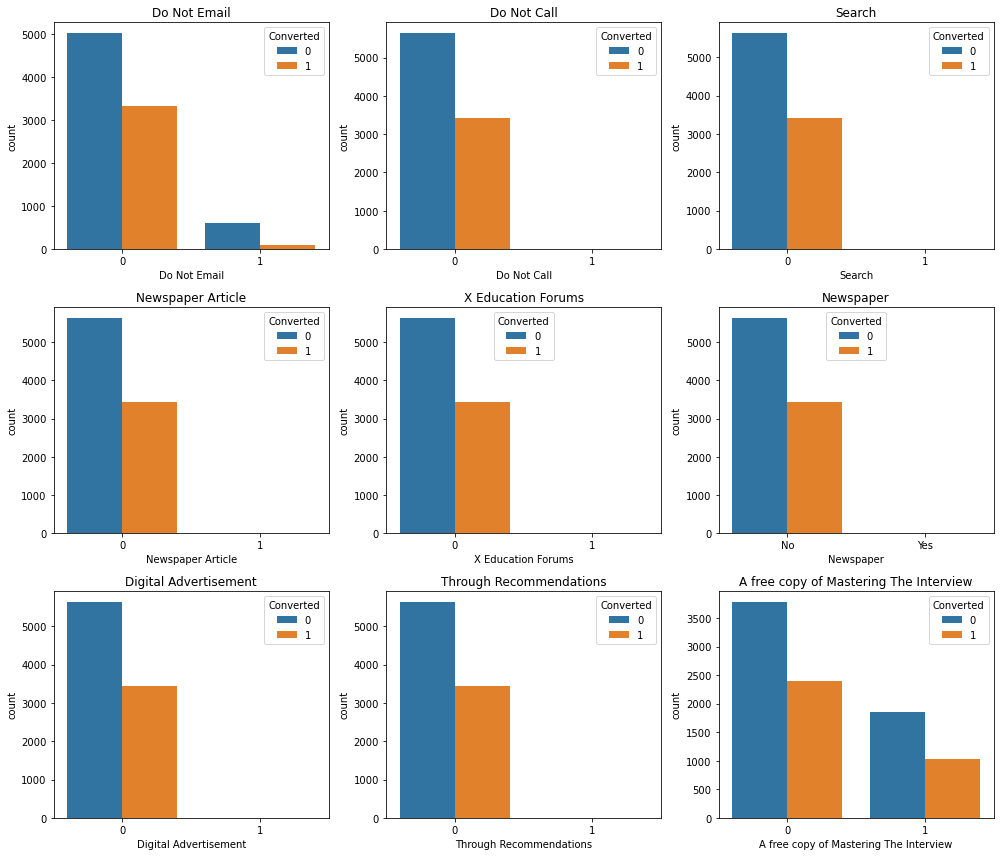

In [82]:
#Features with 0 and 1 values
categorical_variables = list(df_lead.nunique()[df_lead.nunique()==2].index)

categorical_variables.remove('Converted')
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_variables):    
    plt.subplot(3,3,i+1)
    sns.countplot(x=df_lead[col],hue='Converted',data=df_lead)
    plt.title(col)
plt.tight_layout()
plt.show()

Among these features there is high imbalance of data - ['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], hence these columns can be dropped

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

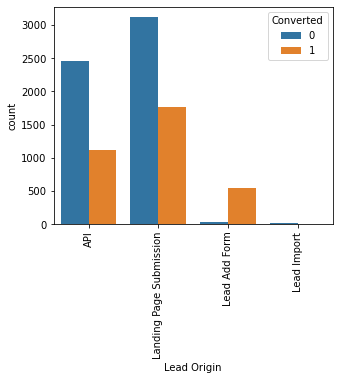

In [59]:
plt.figure(figsize=(5,4))
s1=sns.countplot(df_lead['Lead Origin'], hue=df_lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


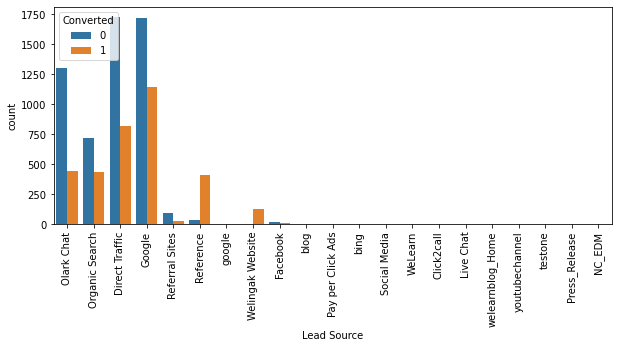

In [61]:
plt.figure(figsize=(10,4))
s1=sns.countplot(df_lead['Lead Source'], hue=df_lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

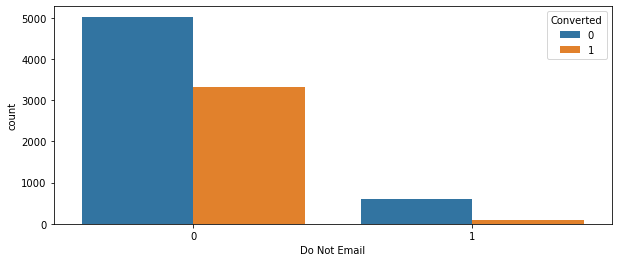

In [63]:
plt.figure(figsize=(10,4))
s1=sns.countplot(df_lead['Do Not Email'], hue=df_lead.Converted)
plt.show()

In [75]:
df_lead['Do Not Email'].value_counts(dropna=False)

0    8358
1     716
Name: Do Not Email, dtype: int64

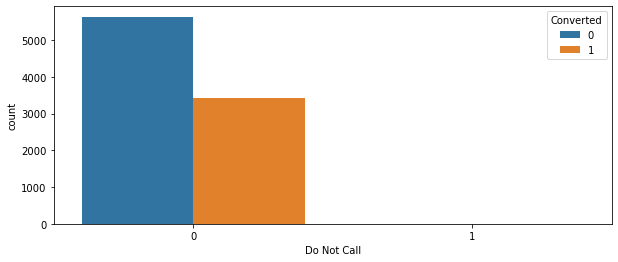

In [64]:
plt.figure(figsize=(10,4))
s1=sns.countplot(df_lead['Do Not Call'], hue=df_lead.Converted)
plt.show()

In [ ]:
### More than 99% of the rows have the same value for 'Do Not Call'. Hence this column can be dropped.
# Code to drop column

In [66]:
df_lead['Do Not Call'].value_counts(dropna=False)


0    9072
1       2
Name: Do Not Call, dtype: int64

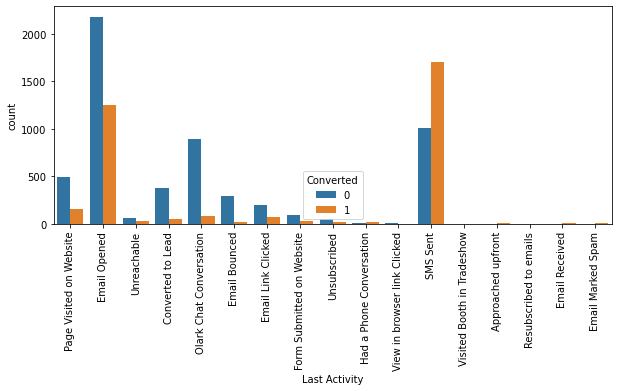

In [68]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Last Activity'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#Can these other columns be grouped together

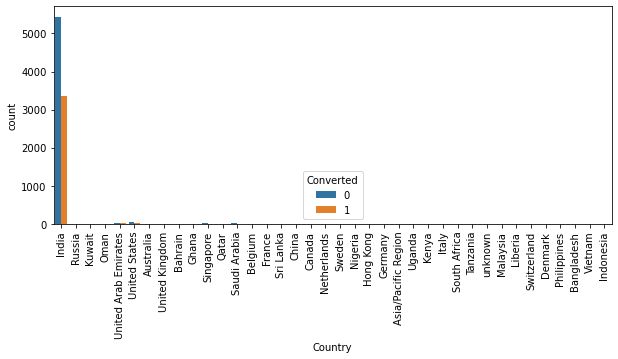

In [69]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Country'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

In [70]:
df_lead['Country'].value_counts(dropna=False)
#Should this column be dropped?

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

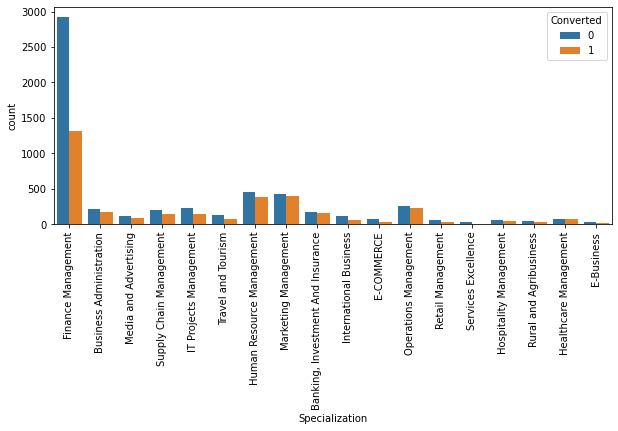

In [71]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['Specialization'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#Comparatively management specialisations have a higher conversion rate/ should these be merged?

In [ ]:
#Rename column "What is your current occupation" and  for easy visualisation?
#df_lead.rename(columns = {'What is your current occupation':'Occupation'}, inplace = True)

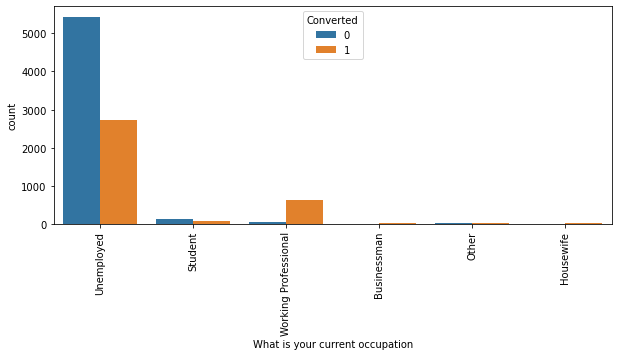

In [72]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['What is your current occupation'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()


Inference
Leads are high among unemployed people but the ratio of conversion is high among working professionals

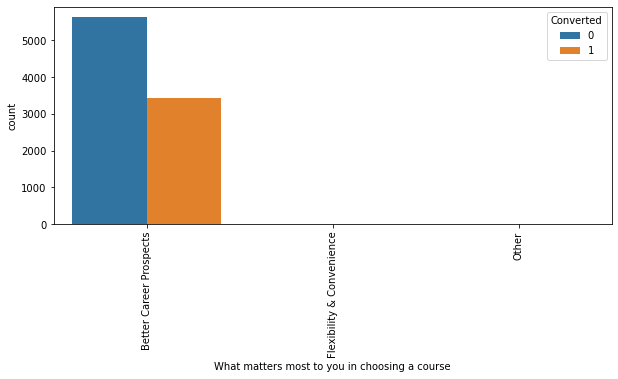

In [73]:
plt.figure(figsize=(10,4))
s3=sns.countplot(df_lead['What matters most to you in choosing a course'], hue=df_lead.Converted)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()


Can we drop this column as more than 99% of the rows have the same value.

In [74]:
df_lead['What matters most to you in choosing a course'].value_counts(dropna=False)



Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
plt.subplot(2,4,2)
s2 = sns.boxplot(x='Lead Source',y='Converted', data=df_lead)
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.subplot(2,4,3)
s3 = sns.boxplot(x='Do Not Email',y='Converted', data=df_lead)
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)

plt.subplot(2,4,4)
s4 = sns.boxplot(x='Do Not Call',y='Converted', data=df_lead)
s4.set_xticklabels(s4.get_xticklabels(),rotation=90)


plt.subplot(2,4,5)
s5 = sns.boxplot(x='Last Activity',y='Converted', data=df_lead)
s5.set_xticklabels(s5.get_xticklabels(),rotation=90)


plt.subplot(2,4,6)
s6 =sns.boxplot(x='Country',y='Converted', data=df_lead)
s6.set_xticklabels(s6.get_xticklabels(),rotation=90)

plt.subplot(2,4,7)
s7=sns.boxplot(x='Specialization',y='Converted', data=df_lead)
s7.set_xticklabels(s7.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#Visualising the numerical variables to infer the linear relationship between these variables
sns.pairplot(df_lead[["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]])
plt.show()

## 4. Data Preparation

#### 4.1 Converting binary features (Yes/No) to 1/0

In [31]:
# List of columns to map
bin_cols =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function to convert Yes/No to 1/0
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_lead[bin_cols] = df_lead[bin_cols].apply(binary_map)

In [32]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,No,0,0,0,Interested in other courses,Low in Relevance,0,0,Other Cities,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,No,0,0,0,Ringing,Not Sure,0,0,Other Cities,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,No,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,No,0,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,No,0,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


#### 4.2 Dummy variables for the Categorical columns 

In [33]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

#list of categorical columns
cat_cols = []

dummy = pd.get_dummies(df_lead[cat_cols], drop_first=True)

# Adding the results to the master dataframe
df_lead = pd.concat([df_lead, dummy], axis=1)

ValueError: No objects to concatenate